# Test multi-modal 2D
---
Description:

- Optimization (max)
- Multimodal (yes)
---

The equations are given by the Multivariate Normal Distribution, with **four** modes:

$f\left(\mathbf{x}\right) = \sum_{i=1}^{4}{\cal N}(\mu_i, \Sigma_i)$,

with mean vectors: $\mu_1 = [-0.0, -1.0]$, $\mu_2 = [-4.0, -6.0]$, $\mu_3 = [-5.0, +1.0]$, $\mu_4 = [5.0, -10.0]$,

and covariances: $\Sigma_1 = \begin{bmatrix} 1.0 & 0.1 \\ 0.1 & 1.0\end{bmatrix}$, 
$\Sigma_2 = \begin{bmatrix} 1.0 & 0.1 \\ 0.1 & 1.0\end{bmatrix}$, $\Sigma_3 = \begin{bmatrix} 1.2 & 0.3 \\ 0.3 & 1.2\end{bmatrix}$,
$\Sigma_4 = \begin{bmatrix} 1.2 & 0.3 \\ 0.3 & 1.2\end{bmatrix}$.

## First we import python libraries and set up the directory

In [1]:
import os, sys
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

# Enable LaTex in plotting.
plt.rcParams["text.usetex"] = True

PROJECT_DIR = os.path.abspath("..")
sys.path.append(PROJECT_DIR)

## Here we import all our custom PSO code

In [2]:
from star_pso.auxiliary.swarm import Swarm
from star_pso.auxiliary.particle import Particle
from star_pso.engines.standard_pso import StandardPSO
from star_pso.auxiliary.utilities import cost_function

## Setup the 2D functions

In [3]:
# Setup the 2D Gaussian functions.
# NOTE: Because of their covariance setup, the first two (mvn_1 and mvn_2)
# will have higher modes then the other two. So the maximum will be in one
# of these two modes.

# Each one with different mean and covariance matrix.
mvn_1 = multivariate_normal([-0.0, -1.0], [[1.0, 0.1], [0.1, 1.0]])

mvn_2 = multivariate_normal([-4.0, -6.0], [[1.0, 0.1], [0.1, 1.0]])

mvn_3 = multivariate_normal([-10.0, 5.0], [[1.2, 0.3], [0.3, 1.2]])

mvn_4 = multivariate_normal([5.0, -10.0], [[1.2, 0.3], [0.3, 1.2]])

# Define the negative log of the pdfs.
def negative_log_pdfx(x):
    return -np.log(mvn_1.pdf(x) + mvn_2.pdf(x) + mvn_3.pdf(x) + mvn_4.pdf(x))
# _end_def_

## Define the multi-modal function

In [4]:
@cost_function(minimize=True)
def fun_test2D(x: np.ndarray, **kwargs) -> float:
    
    # Compute the final value.
    f_value = negative_log_pdfx(x)
    
    # Return the solution.
    return f_value.item()
# _end_def_

## Here we set the PSO parameters

- Set the number of particles 'N'
- Setup the initial population
- Create the PSO object

In [5]:
# Random number generator.
rng = np.random.default_rng()

# Define the number of particles.
N = 100

# Draw random samples for the initial points.
X_t0 = rng.uniform(-15.0, 15.0, size=(N, 2))

# Initial population.
swarm_t0 = Swarm([Particle(x) for x in X_t0])

# Create the StandardPSO object that will carry on the optimization.
test_PSO = StandardPSO(initial_swarm = swarm_t0, obj_func = fun_test2D,
                       x_min = -15.0, x_max = 15.0)

## Optimization process

In [6]:
test_PSO.run(max_it = 500,
             options = {"w0": 0.75, "c1": 1.85, "c2": 1.85, "mode": "multimodal"},
             reset_swarm = True, verbose = True, adapt_params = False)

Initial f_optimal = -2.2005
Iteration:     1 -> f_optimal = -2.4339
Iteration:    51 -> f_optimal = -1.8329
Iteration:   101 -> f_optimal = -1.8329
Iteration:   151 -> f_optimal = -1.8329
Iteration:   201 -> f_optimal = -1.8329
Iteration:   251 -> f_optimal = -1.8329
Iteration:   301 -> f_optimal = -1.8329
Iteration:   351 -> f_optimal = -1.8329
Iteration:   401 -> f_optimal = -1.8329
Iteration:   451 -> f_optimal = -1.8329
Final f_optimal = -1.8329
run: elapsed time = 7.695 seconds.


In [7]:
# Get the optimal solution from the PSO.
_, f_opt, x_opt = test_PSO.get_optimal_values()

# Print the resutls.
print(f"x={x_opt}, f(x) = {f_opt:.5f}")

x=[-3.44555523e-08 -1.00000004e+00], f(x) = -1.83285


In [8]:
best_n = []

for p in test_PSO.swarm.best_n(N):
    best_n.append(p.position)
    
best_n = np.unique(np.array(best_n), axis=0)

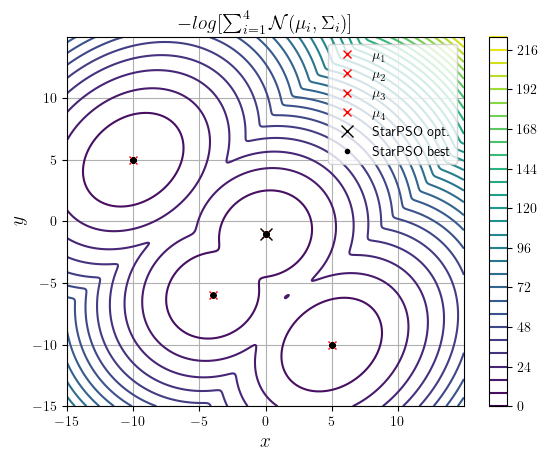

<Figure size 640x480 with 0 Axes>

In [9]:
# Prepare the plot of the real density.
x, y = np.mgrid[-15:15:0.01, -15:15:0.01]

# Stack the position of the grid together.
pos = np.dstack((x, y))

# First plot the contour of the "true" function.
plt.contour(x, y, negative_log_pdfx(pos), levels=30)

# Add the three modes.
plt.plot(+0.0, -1.0, "rx", label="$\mu_1$")
plt.plot(-4.0, -6.0, "rx", label="$\mu_2$")
plt.plot(-10.0, 5.0, "rx", label="$\mu_3$")
plt.plot(5.0, -10.0, "rx", label="$\mu_4$")

# Plot the optimal PSO.
plt.plot(x_opt[0], x_opt[1], "kx", markersize=8, label="StarPSO opt.")

# Plot the best_n.
plt.plot(best_n[:, 0], best_n[:, 1], "k.", label="StarPSO best")

# Add labels.
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.title("$-log[\sum_{i=1}^4{\cal N}(\mu_i, \Sigma_i)]$", fontsize=14)
plt.legend()

# Final setup.
plt.colorbar()
plt.grid()
plt.show()

# Save to file.
plt.savefig("Multimodal_2D.pdf", format="pdf", dpi=300);

### End of file